## Train and test ML model with train-test-split

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# import data
df = pd.read_csv('../Data/df_proteintargets_targettype_appr_fail.csv', sep= ',')

In [3]:
df['Outcome'].value_counts(normalize=True)

1.0    0.952059
0.0    0.047941
Name: Outcome, dtype: float64

In [4]:
# Build a model
# define X and y
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
y.shape, X.shape

((1773,), (1773, 5))

In [5]:
 # Split data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
 #check the shape of the new created training and test data set
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1418, 5), (355, 5), (1418,), (355,))

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

categorical_features = ['KEGG_pathway', 'Biochemical_class', 'Enzyme_class', 'PDB_structure', 'Mode_of_action']
categorical_transformer = OneHotEncoder(sparse=False,handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('OHE', categorical_transformer, categorical_features)
    ]
)

models = [
          ('logreg', LogisticRegression()),
          ('forest', RandomForestClassifier(n_estimators=120))
]
m = VotingClassifier(models)

pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ('smote', SMOTE(random_state=11)),
        ('models', m)
    ]
)

In [15]:
from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['KEGG_pathway',
                                                   'Biochemical_class',
                                                   'Enzyme_class',
                                                   'PDB_structure',
                                                   'Mode_of_action'])])),
                ('smote', SMOTE(random_state=11)),
                ('models',
                 VotingClassifier(estimators=[('logreg', LogisticRegression()),
                                              ('forest',
                                               RandomForestClassifier(n_estimators=120))]))])

In [16]:
preprocessor.fit_transform(X_train).shape

(1418, 939)

In [17]:
pipeline.fit_resample(X_train,y_train)

In [18]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['KEGG_pathway',
                                                   'Biochemical_class',
                                                   'Enzyme_class',
                                                   'PDB_structure',
                                                   'Mode_of_action'])])),
                ('smote', SMOTE(random_state=11)),
                ('models',
                 VotingClassifier(estimators=[('logreg', LogisticRegression()),
                                              ('forest',
                                               RandomForestClassifier(n_estimators=120))]))])

In [19]:
pred = pipeline.predict(X_test)

In [20]:
def print_evaluations(y_test, pred, model_name):
    print(f'Scores of the model {model_name}:')
    print(f'The accuracy of the model is: {round(accuracy_score(y_test, pred), 3)}')
    print(f'The precision of the model is: {round(precision_score(y_test, pred), 3)}')
    print(f'The recall of the model is: {round(recall_score(y_test, pred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(y_test, pred), 3)}')
    
    #print confusion matrixTP
    cm = confusion_matrix(y_test, pred)    
    disp = ConfusionMatrixDisplay(cm, display_labels= ['fail', 'success'])
    disp.plot()

Scores of the model OHE, SMOTEN, LogReg & RandomForest:
The accuracy of the model is: 0.915
The precision of the model is: 0.978
The recall of the model is: 0.932
The f1-score of the model is: 0.955


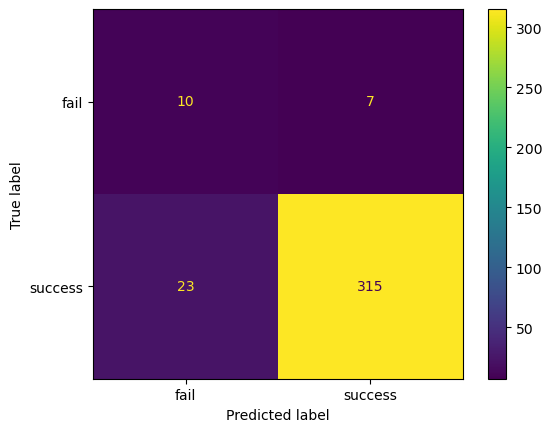

In [21]:
print_evaluations(y_test, pred, "OHE, SMOTEN, LogReg & RandomForest")